# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [582]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv ('SouthCallCenter.csv')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  


In [583]:
#Code Used:
pd.unique(north_df['Rep ID'])

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

In [584]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### EDA Question 1B:  How many reps are in the South branch?  


In [585]:
#Code Used:
pd.unique(south_df['Rep ID'])

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

In [586]:
new_table.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,0.0,3,1


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [587]:
#Code Used:
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean() 

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [588]:
#Code Used:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [589]:
# Code Used:
north_south_df = pd.concat([north_df, south_df], axis=0)
north_south_df.groupby(["Time Block", "Calls"]).size().reset_index(name="Total Calls")

,Time Block,Calls,Total Calls
0,10:00 AM,1,99
1,11:00 AM,1,56
2,12:00 PM,1,120
3,1:00 PM,1,40
4,2:00 PM,1,65
5,3:00 PM,1,73
6,4:00 PM,1,53
7,5:00 PM,1,43
8,9:00 AM,1,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: the only missing data is in the Incoming Wait Time column, i dont want to delete it because it is a good thing that there is no incoming wait time, so i will just change null values to 0 seconds.

In [590]:
# Code Used
# Add Additional Cells as needed.
north_south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64

In [591]:
north_south_df['Incoming Wait Time'] = north_south_df['Incoming Wait Time'].fillna(0)

In [592]:
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(0)

In [593]:
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0)

In [594]:
north_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,0.0,4,1


In [595]:
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,0.0,3,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I noticed that there was whitespace trailing after the "YES" values so I stripped the whitespace 

In [596]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'] = north_df['Sale'].str.replace(" ", "")

In [597]:
north_df['Sale'].tolist()

['NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Using my code it looks like there are not any rows that are duplicated so there are no duplicates to clean.

In [598]:
#Code Used
# Add Additional Cells as needed.
north_south_df.duplicated().any()


False

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Based on the information above and the intention of the assignment, all of the columns regarding calls and reps are necessary because they will be needed to answer future questions. There was a column called 'Unnamed: 0' that I dropped because it just seemed like a duplicate for the index values.

In [599]:
#Code Used
# Add Additional Cells as needed.
dropped_table = north_south_df.drop(['Unnamed: 0'], axis=1)

In [600]:
dropped_table.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,0.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [601]:
# Create dataframe for the entire company named df
df = dropped_table


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent: 37 calls
- South Branch = Eric: 35 calls	


In [602]:
df.groupby(["Rep ID", "Calls", "Branch"]).size().reset_index(name="Total Calls Per Rep")

,Rep ID,Calls,Branch,Total Calls Per Rep
0,Alice,1,South,20
1,Amanda,1,North,23
2,Andy,1,North,23
3,Brent,1,North,37
4,Cam,1,North,24
5,Duke,1,North,29
6,Eric,1,South,35
7,George,1,South,29
8,Helga,1,South,31
9,Joe,1,North,26


In [603]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Rep ID','Branch'], as_index=False)['Calls'].sum().sort_values(by = ['Calls'])

,Rep ID,Branch,Calls
0,Alice,South,20
1,Amanda,North,23
2,Andy,North,23
4,Cam,North,24
19,Xander,North,24
16,Sharon,South,25
10,Josh,South,26
17,Susan,South,26
9,Joe,North,26
11,Karl,South,28


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?

None of the ranges go above 5% of calls abandoned, however, the North branch has significantly higher percentage of abandoned calls.

In [604]:
# Code Used
# Add Additional Cells as needed.
north_df['Abandoned'].mean() * 100

2.857142857142857

In [605]:
south_df['Abandoned'].mean() * 100

1.2738853503184715

In [606]:
north_south_df['Abandoned'].mean() * 100

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80% (196 calls)
- South Branch = 75.16% (236 calls)
- Company Wide = 77.28% (432 calls)

In [607]:
# Code Used
# Add Additional Cells as needed.

north_df['Incoming Wait Time'].value_counts(bins = [0,2]) 

(-0.001, 2.0]    196
Name: Incoming Wait Time, dtype: int64

In [608]:
north_df['Incoming Wait Time'].value_counts(bins = [0,2], normalize = True) *100

(-0.001, 2.0]    80.0
Name: Incoming Wait Time, dtype: float64

In [609]:
south_df['Incoming Wait Time'].value_counts(bins = [0,2]) 

(-0.001, 2.0]    236
Name: Incoming Wait Time, dtype: int64

In [610]:
south_df['Incoming Wait Time'].value_counts(bins = [0,2], normalize = True) *100

(-0.001, 2.0]    75.159236
Name: Incoming Wait Time, dtype: float64

In [611]:
north_south_df['Incoming Wait Time'].value_counts(bins = [0,2]) 

(-0.001, 2.0]    432
Name: Incoming Wait Time, dtype: int64

In [612]:
north_south_df['Incoming Wait Time'].value_counts(bins = [0,2], normalize = True) *100

(-0.001, 2.0]    77.280859
Name: Incoming Wait Time, dtype: float64

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 718.11
- South Branch in seconds = 722.18
- Company Wide in seconds = 720.4


In [613]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [614]:
# Code Used 
avg_answer_north_min = north_df[['Busy Minutes', 'Not Ready Minutes']].mean().sum() * 60
print(avg_answer_north_min)

714.1224489795919


In [615]:
avg_answer_north_sec = north_df[['Incoming Wait Time', 'During Call Wait Time']].mean().sum()
print(avg_answer_north_sec)

3.9877551020408166


In [616]:
sum([avg_answer_north_min, avg_answer_north_sec])

718.1102040816328

In [617]:
avg_answer_south_min = south_df[['Busy Minutes', 'Not Ready Minutes']].mean().sum() * 60
print(avg_answer_south_min)

717.8980891719746


In [618]:
avg_answer_south_sec = south_df[['Incoming Wait Time', 'During Call Wait Time']].mean().sum()
print(avg_answer_north_sec)

3.9877551020408166


In [619]:
sum([avg_answer_south_min, avg_answer_south_sec])

722.1783439490446

In [620]:
avg_answer_total_min = north_south_df[['Busy Minutes', 'Not Ready Minutes']].mean().sum() * 60
print(avg_answer_total_min)

716.2432915921288


In [621]:
avg_answer_total_sec = north_south_df[['Incoming Wait Time', 'During Call Wait Time']].mean().sum()
print(avg_answer_total_sec)

4.152057245080501


In [622]:
sum([avg_answer_total_min, avg_answer_total_sec])

720.3953488372093

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because it was the most visual friendly way to show how the queues vs anandonment rates compare to each other. Since there were only 4 x values the chart was easy to read this way.

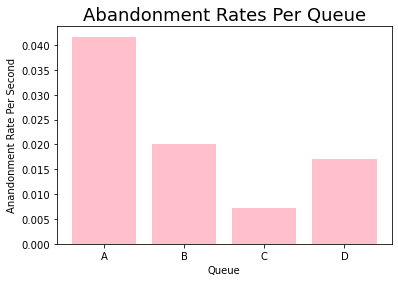

       Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Queue                                                          
A              1          4           946                181   
B              4          3          1501                288   
C              4          1          1409                251   
D              7          3          1748                349   

       Incoming Wait Time  During Call Wait Time  Calls  
Queue                                                    
A                   116.0                    272     96  
B                   134.0                    455    149  
C                   160.0                    435    138  
D                   218.0                    531    176  


In [623]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()),align = 'center', color = 'pink')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.xlabel("Queue", color = 'black')
plt.ylabel("Anandonment Rate Per Second", color = 'black')
plt.title('Abandonment Rates Per Queue', fontsize = 18, color = 'black')
plt.show()
print(queue_dict)


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a grouped bar chart because we were working with multiple variables. This was the easiest way to show the relationships between service level and average speed of answer with each rep.

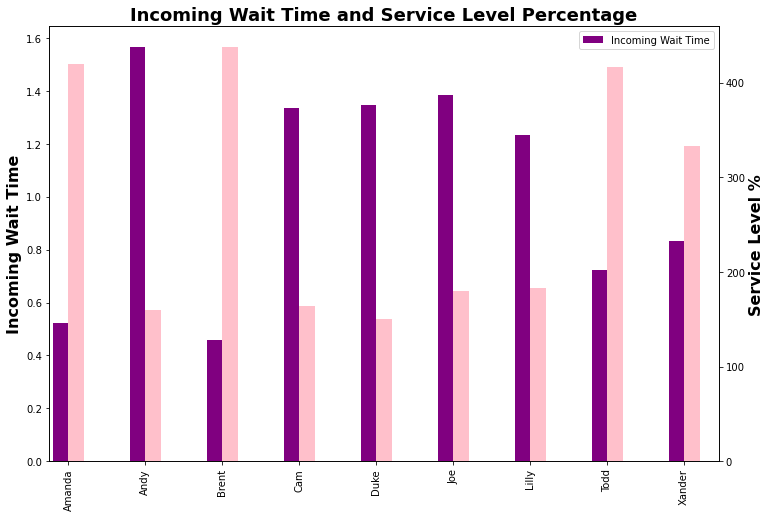

In [624]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
# create matpltlib figure
fig = plt.figure(figsize = (12,8))
# create matpltlib axes
ax = fig.add_subplot(111)
# create second x axis on same fig
ax2 = ax.twinx()
# set width of bars
width = .2

north_plt.plot(kind = 'bar', color = 'purple', ax = ax, width = width, position = 1)
service_level["Service Level %"].plot(kind = 'bar', color = 'pink', ax = ax2, width = width, position = 0)
ax.set_ylabel("Incoming Wait Time", color = 'black', fontsize = 16, fontweight = 'bold')
ax2.set_ylabel("Service Level %" , color = 'black', fontsize = 16, fontweight = 'bold')
plt.title("Incoming Wait Time and Service Level Percentage", color= 'black', fontsize = 18, fontweight = 'bold')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a grouped bar chart again because it was the easiest and most readable way to show the relationship between incoming and outgoing calls for each purpose. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


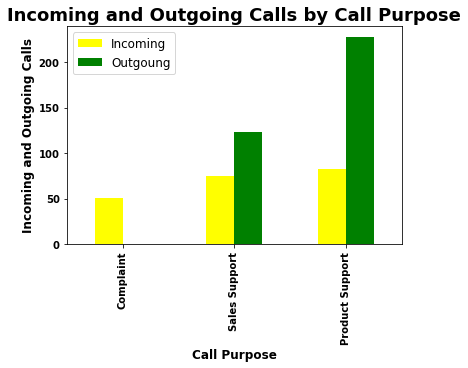

In [625]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
data = {
    "Complaint": [51,0],
    "Sales Support": [75,123],
    "Product Support": [82,228]
    
}
viz3 = pd.DataFrame(data).T
viz3.plot(kind = 'bar', color = ['yellow', 'green'])
plt.xlabel("Call Purpose", color = 'black', fontsize= 12, fontweight = 'bold')
plt.ylabel("Incoming and Outgoing Calls", color = 'black', fontsize = 12, fontweight = 'bold')
plt.title("Incoming and Outgoing Calls by Call Purpose", color = 'black', fontsize = 18, fontweight = 'bold')
plt.legend(["Incoming", "Outgoung"], loc = 'upper left', prop = {'size': 12}, fontsize = 12)
plt.xticks(color = 'black', fontsize = 10, fontweight = 'bold')
plt.yticks(color = 'black', fontsize = 10, fontweight = 'bold')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Even though the South Branch has more reps, the data shows that the North branch is operating more efficiently. The North branch has a 5% higher percentage of calls answered within 2 seconds and a slightly quicker speed of answer. However, the South branch has a 1.59% lower abandonment rate, I believe due to them having 2 more reps than the North branch. Even though the gap in KPIs between the two branches are not that different I believe the North branch is more efficient due to them having 2 less reps than the South branch. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The branch I believe would benefit from the extra help would be the North branch. Brent is clearly the stand out employee in the North branch with 7 more calls than the next best employee, Lilly. I believe the extra help would be best allocated to the North branch to even out the numbers and have less call abandonment and less wait time.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Something I was pondering throughout this assignemnt was the employee pay. Monetary reasons reflect a lot on how well or efficiently employees work and whether they get paid by the hour, on comission, salary, etc. would affect the efficiency of the call centers.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: